# **Prediction using supervised ML**

**Predict the percentage of a student based on the no. of study hours.**

**This is a simple linear regression task which involves only 2 variables.**

In [250]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pplot 
%matplotlib inline

In [251]:
url = 'https://bit.ly/3kXTdox'
student_data = pd.read_csv(url)
print("Data has been imported\n")
student_data.head(15)

Data has been imported



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [252]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Lets plot the data on a 2-Dimensional graph and lookout for relationships between them.**

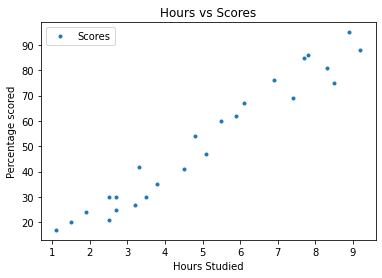

In [253]:
student_data.plot(x = 'Hours', y = 'Scores', style = '.')
pplot.title("Hours vs Scores")
pplot.xlabel("Hours Studied")
pplot.ylabel("Percentage scored")
pplot.show()


**The above graph shows that there is positive linear relationship between hours studied and the marks scored**

### **Preparing the data**

Here we divide the data into 'features' (inputs) and 'labels' (outputs).

In [254]:
X = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values
print('Hours: ',*X,'\n')
print('Scores:',y,'\n')

Hours:  [2.5] [5.1] [3.2] [8.5] [3.5] [1.5] [9.2] [5.5] [8.3] [2.7] [7.7] [5.9] [4.5] [3.3] [1.1] [8.9] [2.5] [1.9] [6.1] [7.4] [2.7] [4.8] [3.8] [6.9] [7.8] 

Scores: [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86] 



### **Training and Test sets**

Here we split the data set into Training and Test sets

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Training input:', *X_train,'\n')
print('Testing input:', *X_test,'\n')
print('Training output', y_train,'\n')
print('Testing ouput:', y_test,'\n')

Training input: [3.8] [1.9] [7.8] [6.9] [1.1] [5.1] [7.7] [3.3] [8.3] [9.2] [6.1] [3.5] [2.7] [5.5] [2.7] [8.5] [2.5] [4.8] [8.9] [4.5] 

Testing input: [1.5] [3.2] [7.4] [2.5] [5.9] 

Training output [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41] 

Testing ouput: [20 27 69 30 62] 



**After spliting the data set we now train the algorithm**

In [256]:
#Training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print('Model has been trained')


Model has been trained


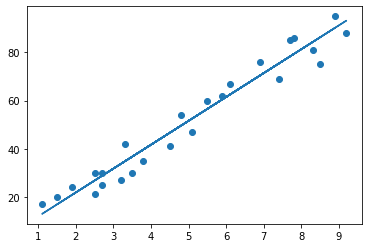

In [257]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#Plotting for the test data
pplot.scatter(X,y)
pplot.plot(X,line);
pplot.show()

The algorithm has been trained, we now make predictions

In [258]:
print(X_test)
y_prediction = regressor.predict(X_test)
print(*y_prediction,sep=',')

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
16.884144762398027,33.732260779489835,75.35701799818723,26.794801243040265,60.49103327722388


In [259]:
#Comparing actual data with predicted data
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [260]:
#Testing with new data
hours = [[9.25]]
own_prediction = regressor.predict(hours)
print("Number of hours: ", hours)
print("Predicted score:", own_prediction)

Number of hours:  [[9.25]]
Predicted score: [93.69173249]


### **Evaluation of model**

After making predictions we will now evaluate the model based on certain metrics.
Here I have used "mean absolute error" as a metric to evaluate the accuracy of the model

In [261]:
from sklearn import metrics
Mean_Absolute_Error = metrics.mean_absolute_error(y_test,y_prediction)
print('Mean Absolute Error:', Mean_Absolute_Error)

Mean Absolute Error: 4.18385989900298
